# Gaussian Processs in network
Edit by Tianpei Xie, 03/21/2016
## Motivations
In network analysis, the complete information of a network topology in terms of the graph adjacency matrix is usually  available to the researcher. On the other hand, it is difficult to obtain full information regarding nodes attributes due to the sloppiness of individuals, the policy constraints or the privacy concerns. It is thus important to predict the missing node attributes given a subset of node attributes and the graph topology.

In this project, we consider latent representations of nodes in a network using a probabilistic model. We assume that each node attribute vector $\mathbf{x}_{v}$ is generated  from a probabilistic latent variable model  $P(\mathbf{x}| \mathbf{z}, \mathcal{E})$, where $\mathcal{E}$ defines a network topology $\mathcal{G} = (\mathcal{V}, \mathcal{E})$ and $\mathbf{x}_{v}$ is the attribute for node $v\in \mathcal{V}$. 

Our goal is to predict an unobserved node attribute vector $\mathbf{x}_{u}$ given all the attributes from the other observed nodes $\mathbf{x}_{\mathcal{V}}$ and the graph topology $\mathcal{E}$.

Consider the $k$-dimensional eigen-subspace $\mathbf{U} \in G(|\mathcal{V}|, k) \equiv \mathcal{O}(|\mathcal{V}|)/\mathcal{O}(k) \times \mathcal{O}(|\mathcal{V}|-k)$ of the (normalized) Laplacian $\mathbf{L} \equiv  \mathbf{A}_{W} - \mathbf{A}$ or $\mathbf{L} \equiv  \mathbf{I} - \mathbf{A}_{W}^{-1/2}\mathbf{A}\mathbf{A}_{W}^{-1/2} $, where each row of $\mathbf{U}$, $\mathbf{u}_{n}^{\tau} \in \mathbb{R}^{k}$ provides a coordinate of each node in the graph under a set of spectral axes. Let $\mathbf{z}_{v} = \mathbf{u}_{v}^{\tau} \in \mathcal{R}^{k}$ be the latent index of a node attribute $\mathbf{x}_{v}$. 

So 
\begin{align}
\mathbf{x}_{v} &= f(\mathbf{u}_{v}) + \mathbf{n}_{v}
\end{align}


A common question is to ask how much information regarding the topology of the network is incorporated. It is especially important if the node is sub-sampled from the graph. 


In [31]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import pandas as pd
%matplotlib inline 

plt.close('all')
Ifsavefig = False
Ifsavedata = False

In [32]:
size = 40
color_map = {0:'r', 1:'c', 2:'y'}
#center = np.zeros(2)
#center[1] = 1
center = None

n = 40
m = 0
G0= nx.barbell_graph(n,m) 
#generate the bar-bell graph, which consists of two fully connected component and a path connecting them 

label0 = np.zeros([2*n,1])
label0[n:2*n] = np.ones([n,1])
# labeling of the cluster
for node in G0.nodes():
    G0.node[node]['category'] = int(label0[node,0])

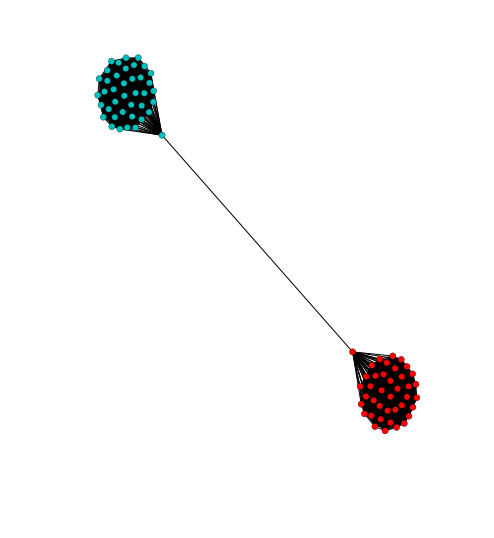

In [28]:
fig= plt.figure(1)
fig.set_size_inches(8.0, 8.0)


ax1 = plt.axes()
#ax = fig.add_axes([0, 0, 1.5, 1.5])

pos = nx.spring_layout(G0, center= center)
ax=nx.draw(G0, pos=pos, node_size = size,\
           node_color=[color_map[G0.node[node]['category']] for node in G0])  
limits=plt.axis('off') # turn of axis
txt = "A barbell graph (" + "n=" + str(n) + ", m=" + str(m) + ")" 
#plt.text(0.1,-0.1,txt, fontsize='x-large')
fig.subplots_adjust(wspace=0.3, top= 1)
if Ifsavefig:
    fig.savefig('../figure/graph_spring_plot_03_21_16.eps')

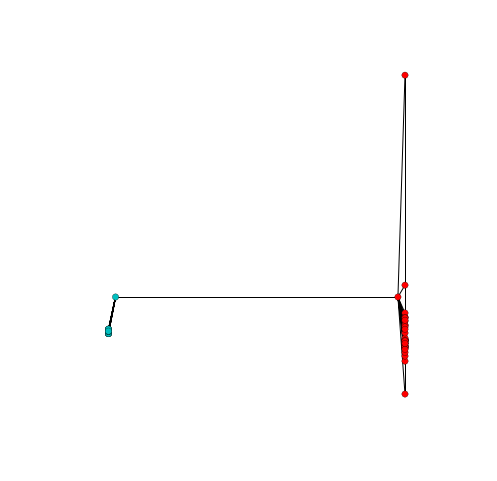

In [29]:
fig= plt.figure(1)
fig.set_size_inches(8.0, 8.0)
ax2 = plt.axes()
#plt.subplot(222, sharey = ax1)
pos0 = nx.spectral_layout(G0, center= center) #nx.spring_layout(G)
ax=nx.draw(G0,pos=pos0, node_size = size, \
           node_color=[color_map[G0.node[node]['category']] for node in G0])  
limits=plt.axis('off') # turn of axis
txt = "Spectral layout "

#plt.text(0,-0.2,txt, fontsize='x-large')
plt.subplots_adjust(hspace = .001)
if Ifsavefig:
    fig.savefig('../figure/graph_spectral_plot_03_21_16.eps')
#=======================================================

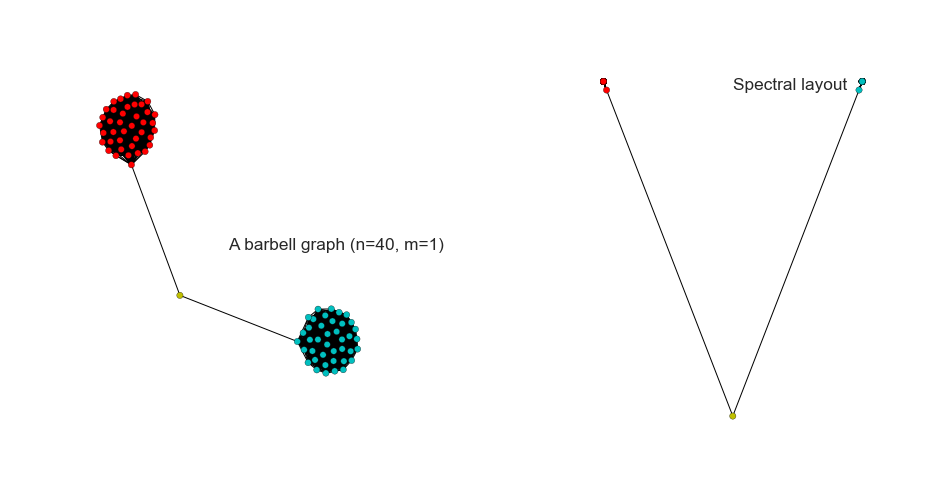

In [90]:
fig= plt.figure(1)
fig.set_size_inches(16.0, 8.0)

m = 1
G1= nx.barbell_graph(n,m)
label1 = np.zeros([2*n+m,1])
label1[n:n+m] = 2*np.ones([m,1])
label1[n+m:2*n+m] = np.ones([n,1])
# labeling of the cluster
for node in G1.nodes():
    G1.node[node]['category'] = int(label1[node,0])   

ax2 = plt.subplot(121)
pos = nx.spring_layout(G1)
ax=nx.draw(G1,pos=pos, node_size = size,\
           node_color=[color_map[G1.node[node]['category']] for node in G1])  
limits=plt.axis('off') # turn of axis
txt = "A barbell graph (" + "n=" + str(n) + ", m=" + str(m) + ")" 
plt.text(0,-0.1,txt, fontsize='x-large')
fig.subplots_adjust(wspace=0.3)

plt.subplot(122)
pos1 = nx.spectral_layout(G1) #nx.spring_layout(G)
ax=nx.draw(G1,pos=pos1, node_size = size, \
           node_color=[color_map[G1.node[node]['category']] for node in G1])  
limits=plt.axis('off') # turn of axis
txt = "Spectral layout "

plt.text(0,-0.1,txt, fontsize='x-large')
plt.subplots_adjust(hspace = .001)

Note that the spectral layout of the graph provide a footprint of the process. The index of the process is the node index of the graph. 

To identify the spectral layout of the graph, we need construct the linear subspace spanned by k-smallest eigenvectors $\mathbf{U} \in G(|\mathcal{V}|, k) \equiv \mathcal{O}(|\mathcal{V}|)/\mathcal{O}(k) \times \mathcal{O}(|\mathcal{V}|-k)$ of the (normalized) Laplacian $\mathbf{L} \equiv  \mathbf{I} - \mathbf{A}_{W}^{-1/2}\mathbf{A}\mathbf{A}_{W}^{-1/2} $

k = 3;
nnodes = nx.adjacency_matrix(G0).shape[0]
eigenvalues,eigenvectors=  sp.linalg.eigh(nx.laplacian_matrix(G0).todense())
index = np.arange(1,k)
pos0_mat = np.real(eigenvectors[:,index])

In [33]:
#generate the eigenspace of normalized Laplacian
k = 3
nnodes = nx.adjacency_matrix(G0).shape[0]

ncv=max(2*k+1,int(np.sqrt(nnodes)))

eigenvalues,eigenvectors= sp.sparse.linalg.eigsh(nx.laplacian_matrix(G0).asfptype(), k=k, \
                                                which='SM', return_eigenvectors = True, ncv=ncv)
index=np.argsort(eigenvalues)[1:k] # 0 index is zero eigenvalue    
pos0_mat = np.real(eigenvectors[:,index])

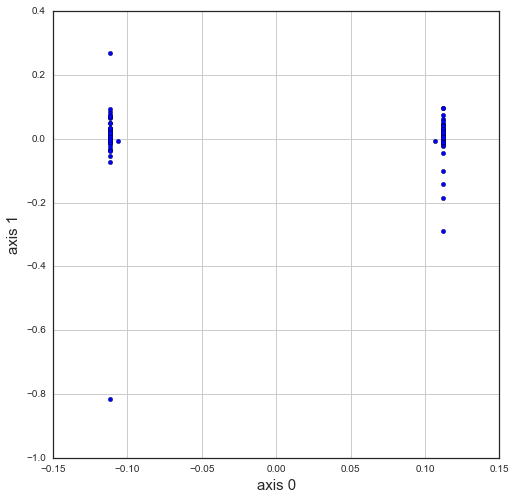

In [85]:
fig = plt.figure(2)
fig.set_size_inches(8.0, 8.0)
plt.scatter(pos0_mat[:,0], pos0_mat[:,1])
#plt.title('Scatter plot of spectral layout z', fontsize = 15)
plt.ylabel('axis 1', fontsize=15)
plt.xlabel('axis 0', fontsize=15)
plt.grid()
plt.show()
if Ifsavefig:
    fig.savefig('../figure/spectral_position_03_21_16.eps')

Using the sigmoid kernel 
\begin{align}
  k(x, y) &= \tanh( \gamma x^\top y + c_0)
\end{align}

In [34]:
from sklearn.metrics.pairwise import rbf_kernel, pairwise_kernels
N = pos0_mat.shape[0]
d = pos0_mat.shape[1]

In [35]:
gamma = 2.3; coef0 = 1
#latent_index = np.arange(N) - N/2
Kernel = pairwise_kernels(X=pos0_mat, metric='sigmoid', n_jobs=8, gamma=gamma, coef0=coef0) 

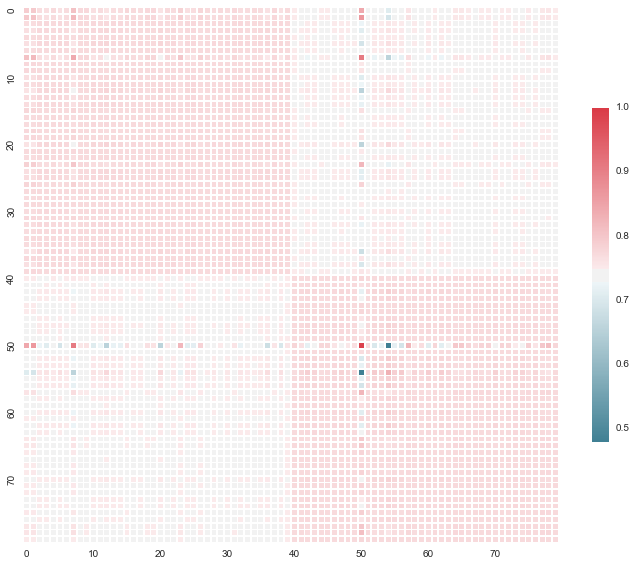

In [36]:
fig= plt.figure(5)
fig.set_size_inches(12.0, 12.0)
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = plt.axes()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Kernel, cmap=cmap, vmax=1, #.3,
            square=True, xticklabels=10, yticklabels=10,
            linewidths=.8, cbar_kws={"shrink": .5}, ax=ax)
#ax.set_title('sigmoid kernel', fontsize = 20)
plt.show()
if Ifsavefig:
    fig.savefig('../figure/sigmoid_kernel_03_21_16.eps')

In [24]:
Kernel_rbf = rbf_kernel(X=pos0_mat, gamma=10)

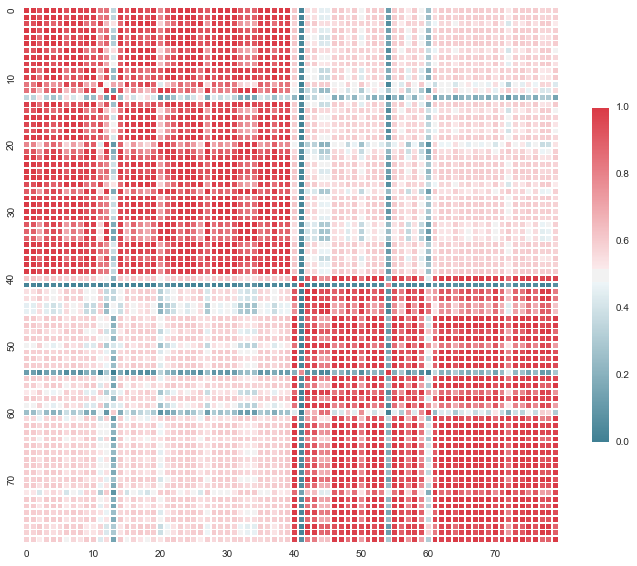

In [27]:
fig= plt.figure(5)
fig.set_size_inches(12.0, 12.0)
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

ax = plt.axes()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Kernel_rbf, cmap=cmap, vmax=1, vmin=0,#.3,
            square=True, xticklabels=10, yticklabels=10,
            linewidths=.8, cbar_kws={"shrink": .5}, ax=ax)
#ax.set_title('sigmoid kernel', fontsize = 20)
plt.show()
if Ifsavefig:
    fig.savefig('../figure/rbf_kernel_03_21_16.eps')

The Gaussian process 
\begin{align}
[\mathbf{x}_{1}, \ldots, \mathbf{x}_{|\mathcal{V}|}] &\sim \mathcal{N}(\mathbf{0}, \mathbf{K})
\end{align}
with 
$$
  \mathbf{K} = [k(\mathbf{u}_{n}, \mathbf{u}_{m})]_{n,m \in \mathcal{V}}
$$

It is seen from above figures that when the spectral position of nodes from different clusters are far from each other, then the Kernel matrix will be block diagonal, indicating that the Gaussian process can be divided as two mutual independent subprocess. 

In [38]:
mean = np.zeros([N,])
sigma = 0.01  #6.36008
cov = Kernel+ sigma*np.eye(N) #np.dot(np.dot(pos0_mat.T, Kernel+ sigma*np.eye(N)), pos0_mat)
x = np.random.multivariate_normal(mean, cov, k-1).T
x.shape

/home/tianpei/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: covariance is not positive-semidefinite.


(80, 2)

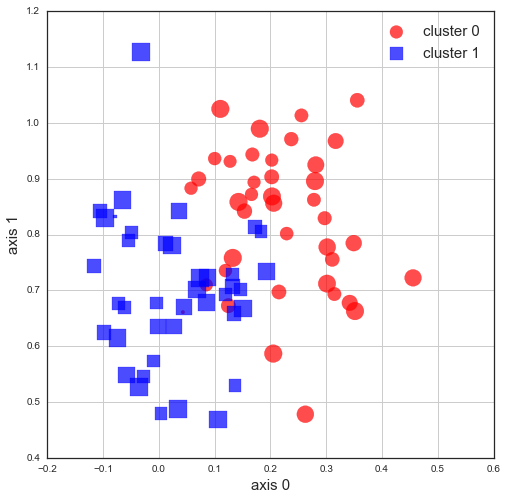

In [44]:
fig = plt.figure(3)
fig.set_size_inches(8.0, 8.0)
radius  = 2+ 8*(1- np.exp(-1000*(np.diag(Kernel)- np.min(np.diag(Kernel)))))
area = np.pi * radius**2
#area = np.pi * (10 * np.diag(Kernel))**2
ax = plt.axes()
handle1 = plt.scatter(x[np.arange(0,int(N/2)),0], x[np.arange(0,int(N/2)),1], s=area[np.arange(0,int(N/2))],\
                      color='r', marker='o', alpha=0.7)
handle2 = plt.scatter(x[int(N/2)+np.arange(0,int(N/2)),0], x[int(N/2)+np.arange(0,int(N/2)),1], \
                        s=area[int(N/2)+np.arange(0,int(N/2))], \
                        color='b', marker='s', alpha=0.7)
#plt.title('Scatter plot of spectral layout z', fontsize = 15)
plt.ylabel('axis 1', fontsize=15)
plt.xlabel('axis 0', fontsize=15)
ax.legend([handle1, handle2], ['cluster 0', 'cluster 1'], fontsize = 15)
plt.grid()
plt.show()

if Ifsavefig:
    fig.savefig('../figure/Gaussian_Process_03_21_16.eps')

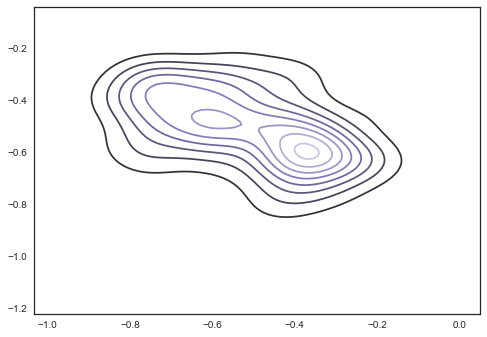

In [81]:
fig = plt.figure(3)
ax = sns.kdeplot(x[:,0], x[:,1], n_levels=10, cmap="Purples_d")
if Ifsavefig:
    fig.savefig('../figure/Gaussian_Process_kde_03_21_16.eps')

The feature generated from two mutual independent Gaussian processes are well-separated.

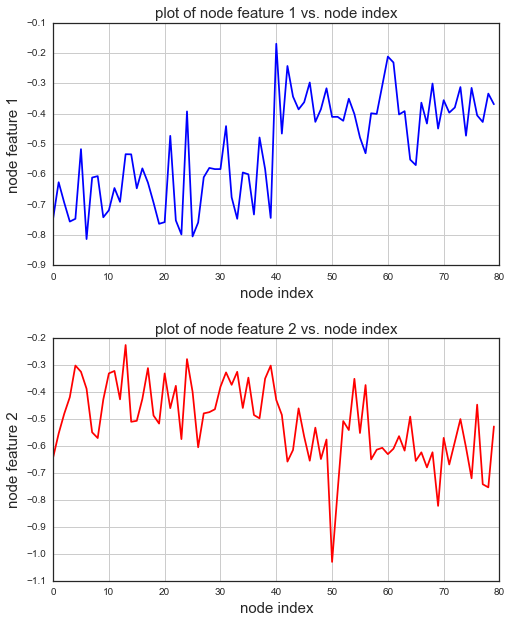

In [41]:
fig = plt.figure(4)
fig.set_size_inches(8.0, 10.0)
ax1 = plt.subplot(211)
plt.plot(np.arange(N), x[:,0], '-b')
plt.title('plot of node feature 1 vs. node index', fontsize = 15)
plt.ylabel('node feature 1', fontsize=15)
plt.xlabel('node index', fontsize=15)
plt.grid()
fig.subplots_adjust(hspace=0.3)


ax2 = plt.subplot(212, sharex = ax1)
plt.plot(np.arange(N), x[:,1], '-r')
plt.title('plot of node feature 2 vs. node index', fontsize = 15)
plt.ylabel('node feature 2', fontsize=15)
plt.xlabel('node index', fontsize=15)
plt.grid()
fig.subplots_adjust(hspace=0.3)


plt.show()

In [43]:
%store

Stored variables and their in-db values:


In [52]:
if Ifsavedata:
    nx.write_adjlist(G0, "../data/experiment_03_21_2016.adjlist",delimiter=',')
    nx.write_edgelist(G0, "../data/experiment_03_21_2016.edgelist")

    np.savez("../data/experiment_03_21_2016.npz", Kernel, x, pos0_mat, gamma, sigma)

Interactive namespace is empty.
